In [1]:
from helper import *
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

### Calculate line between 2 points

In [2]:
pt1 = Point(2.1794, -1.4935)
pt2 = Point(1.6132, 1.9832)
line = Line_Equation(pt1, pt2)
print(line)

[-0.51648219 -0.08411201  1.        ]


### Calculate point intersection of 2 lines

In [6]:
l1 = np.array([3.1, 2.4, 2.0])
l2 = np.array([4.2, 8.6, 4.5])
print(np.cross(l1, l2))

[-6.4  -5.55 16.58]


### Calculate homography
 * Using at least 4 points of corresponding points using **Normalized** Direct Linear Transformation

In [18]:
src = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
dst = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
h_matrix = compute_homography(src, dst)
print(h_matrix)

[[ 4. -4.  4.]
 [ 5. -5.  5.]
 [ 1. -1.  1.]]


### Find acute angle theta between 2 lines

In [11]:
l1 = np.array([4, -1, 2])
l2 = np.array([-1, -1, 3])
c = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]])
num = np.matmul(np.matmul(l1, c), l2)
den1 = math.sqrt(np.matmul(np.matmul(l1, c), l1))
den2 = math.sqrt(np.matmul(np.matmul(l2, c), l2))
print(f"Angle is {180 - math.degrees(math.acos(num/den1/den2))}")

Angle is 59.03624346792648


### Find conic that contains 5 pts
 - (x^2, xy, y^2, x, y, 1)c = 0 for 5 pts

In [17]:
constraints = np.array([[0, 0, 16, 0, -4, 1],
                       [1, -6, 36, 1, -6, 1],
                       [9, 6, 4, 3, 2, 1],
                       [16, 4, 1, 4, 1, 1],
                       [4, -2, 1, 2, -1, 1]])
u, s, vh = np.linalg.svd(constraints)
a, b, c, d, e, f = vh[-1, :]
C = np.array([[a, b/2, d/2], [b/2, c, e/2], [d/2, e/2, f]])
print(f"Conic matrix is:\n {C}")

Conic matrix is:
 [[ 0.09802932 -0.05057896 -0.27844499]
 [-0.05057896  0.01981444  0.1360939 ]
 [-0.27844499  0.1360939   0.7717202 ]]


### Find conic using 5 orthogonal line pairs
 - ([l1 * m1,  (l1 * m2 + l2 * m1)/2,  l2 * m2, (l1 * m3 + l3 * m1)/2,  (l2 * m3 + l3 * m2)/2,  l3 * m3])C = 0

In [ ]:
constraints = np.array([[0, 0, 16, 0, -4, 1],
                       [1, -6, 36, 1, -6, 1],
                       [9, 6, 4, 3, 2, 1],
                       [16, 4, 1, 4, 1, 1],
                       [4, -2, 1, 2, -1, 1]])
u, s, vh = np.linalg.svd(constraints)
a, b, c, d, e, f = vh[-1, :]
C = np.array([[a, b/2, d/2], [b/2, c, e/2], [d/2, e/2, f]])
print(f"Conic matrix is:\n {C}")

### Pinhole model

In [ ]:
# 3D point (X, Y, Z) -> 2D point (fX/Z, fY/Z) -> Homo point (fX, fY, Z)

# p = principal point offset

# f s px 0     X
# 0 f py 0  X  Y  =  2D point
# 0 0 1 0     Z
#             1

### Finding camera orientation and parameters
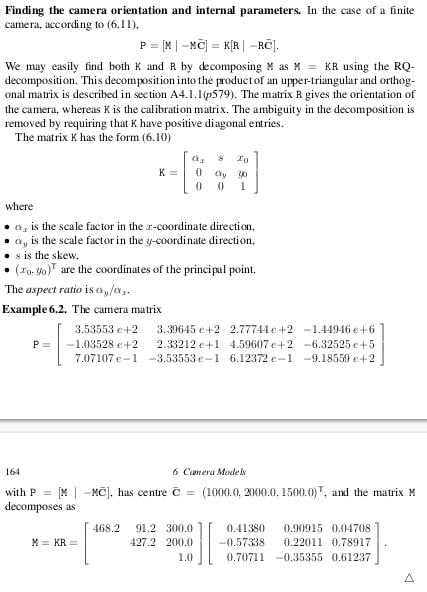

In [56]:
from scipy.linalg import rq, svd
p = np.array([[3.53553e+2, 3.9645e+2, 2.77744e+2, -1.44946e+6],
              [-1.03528e+2, 2.33212e+1, 4.59607e+2, -6.32525e+5],
              [7.07107e-1, -3.53553e-1, 6.12372e-1, -9.18559e+2]
             ])

u, s, vh = svd(p)
C = vh[-1] / vh[-1, -1]
print(C)

# Find K and R
M = p[:, :3]
K, R = rq(M)
print(f"K = \n{K}\n\nR = \n{R}\n")

# Check if K is positive
diag = np.diag(np.sign(np.diag(K)))
print(f"signs of diagonals = \n{diag}\n")
print(f"K' = \n{K @ diag}\n\nR' = \n{diag @ R}\n")

np.allclose(M, K @ diag**2 @ R)

[9.09559539e+02 1.80129723e+03 1.48971070e+03 1.00000000e+00]
K = 
[[ 519.80885822 -103.72847843 -279.91643312]
 [   0.         -427.20086371 -199.99985412]
 [   0.            0.           -0.99999975]]

R = 
[[ 0.41380237  0.90914861  0.04707869]
 [ 0.57338211 -0.22011137 -0.78916661]
 [-0.70710718  0.35355309 -0.61237215]]

signs of diagonals = 
[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]

K' = 
[[519.80885822 103.72847843 279.91643312]
 [  0.         427.20086371 199.99985412]
 [  0.           0.           0.99999975]]

R' = 
[[ 0.41380237  0.90914861  0.04707869]
 [-0.57338211  0.22011137  0.78916661]
 [ 0.70710718 -0.35355309  0.61237215]]



True

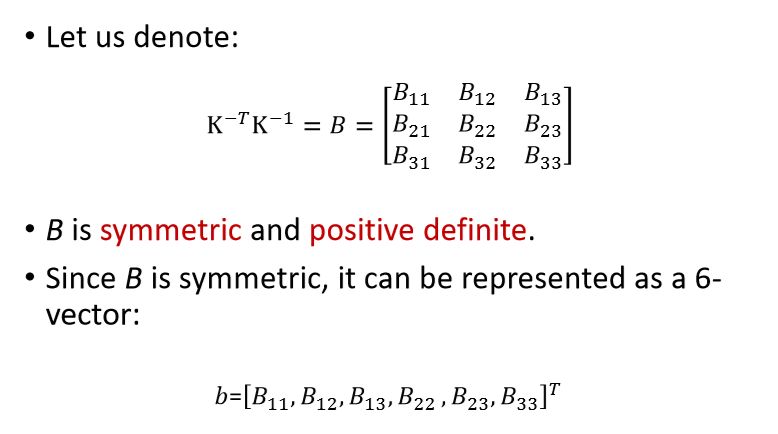
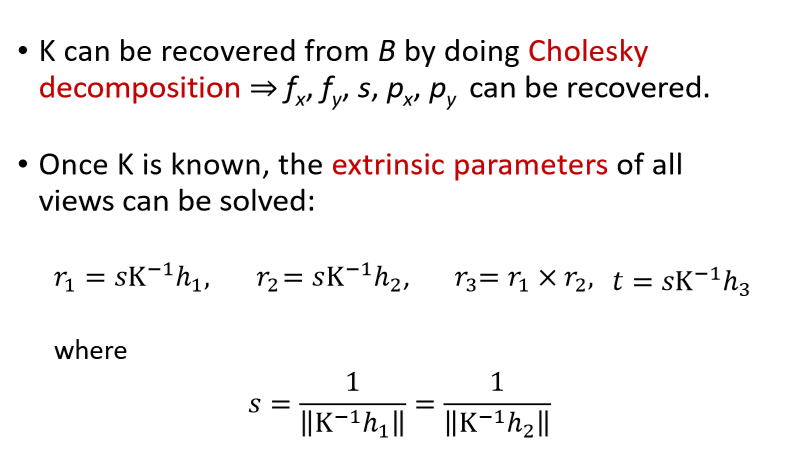

K^-TK^-1 can be recovered from B using cholesky decomp on B^-1b

In [57]:
val = np.array([250.15, 150.23, 1])
print(np.linalg.inv(val))

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

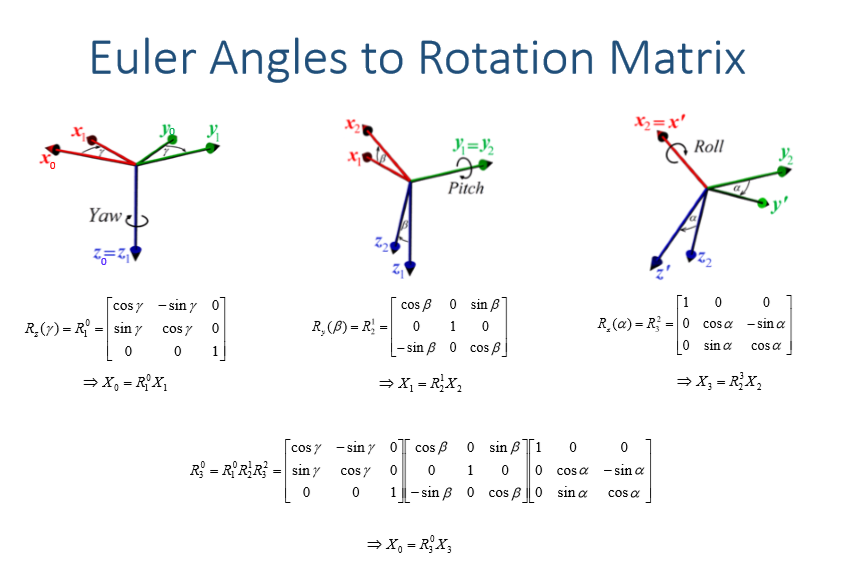

In [3]:
def invert_extrinsic(cam_matrix):
    """Invert extrinsic matrix"""
    irot_mat = cam_matrix[:3, :3].transpose()
    trans_vec = cam_matrix[:3, 3, None]

    inverted = np.concatenate([irot_mat,  -irot_mat @ trans_vec], axis=1)
    return inverted

In [5]:
matrix = [[1, 0, 0, 0], 
         [0, 1, 0, 0],
         [0, 0, 1, 0]]
matrix = np.array(matrix)
invert_extrinsic(matrix)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [ ]:
a = [[1, 0, 0, 0], 
    [0, 1, 0, 0],
    [0, 0, 1, 0]]